In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Shanghai_HMT_2010.csv')

In [3]:
data.head(10)

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,-7.0,59.21,1023.0,0.0,SE,11.0,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,-6.0,59.48,1023.0,1.0,SE,14.0,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,-5.0,64.18,1023.0,1.0,SE,17.0,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,-3.0,69.43,1023.0,2.0,SE,20.0,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,-2.0,64.90,1023.0,4.0,SE,23.0,0.0,0.0


In [4]:
data = data[['year','month', 'day', 'hour', 'season', 'DEWP', 'HUMI', 'PRES', 'TEMP']]

In [5]:
data = data.dropna()

<AxesSubplot:>

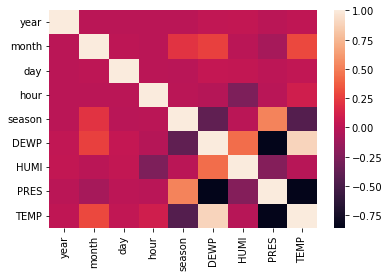

In [6]:
sns.heatmap(data[data.columns].corr(method="pearson"))

In [7]:
data = (data - data.mean()) / data.std()

In [8]:
data.head(10)

,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP
0,-1.46402,-1.601901,-1.673804,-1.661611,1.350683,-1.750707,-0.569657,1.118194,-1.767784
1,-1.46402,-1.601901,-1.673804,-1.517132,1.350683,-1.750707,-0.569657,1.007291,-1.767784
2,-1.46402,-1.601901,-1.673804,-1.372653,1.350683,-1.851952,-0.584949,1.007291,-1.875122
3,-1.46402,-1.601901,-1.673804,-1.228174,1.350683,-1.750707,-0.317045,0.885297,-1.875122
4,-1.46402,-1.601901,-1.673804,-1.083695,1.350683,-1.750707,-0.317045,0.774393,-1.875122
5,-1.46402,-1.601901,-1.673804,-0.939216,1.350683,-1.851952,-0.584949,0.774393,-1.875122
6,-1.46402,-1.601901,-1.673804,-0.794737,1.350683,-1.750707,-0.569657,0.774393,-1.767784
7,-1.46402,-1.601901,-1.673804,-0.650258,1.350683,-1.649462,-0.303451,0.774393,-1.767784
8,-1.46402,-1.601901,-1.673804,-0.505779,1.350683,-1.446973,-0.006094,0.774393,-1.660445
9,-1.46402,-1.601901,-1.673804,-0.361300,1.350683,-1.345728,-0.262671,0.774393,-1.445768


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.pipeline import make_pipeline

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['PRES'], axis=1), data['PRES'], test_size=0.05)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [12]:
mean_squared_error(predictions, y_test)

0.1893077855624728

In [13]:
plot_start = 100
plot_end = 200

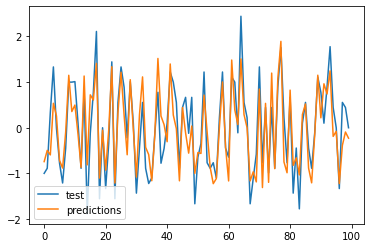

In [14]:
plt.plot(np.array(y_test[plot_start:plot_end]), label='test')
plt.plot(np.array(predictions[plot_start:plot_end]), label='predictions')
plt.legend(loc='lower left')
plt.show()